# Time Series Data Trend and Seasonality

A time series dataset is a collection of observations gathered at constant time intervals (minute by minute, hourly, daily, monthly, yearly, etc.).  In general, time series data are often **non-stationary**.  Trend and seasonality are the 2 main reasons behind non-stationarity.

- **Trend** is defined as the changing of time series mean over time.
- **Seasonality** is variations which occur regularly at specific times.

It is essential to understand that the presence of trend and/or seasonality in a time series dataset is not good when using time series models to make predictions.  Therefore, you must apply methods for trend and seasonality detection in the data.

# Using Graphs to Detect Trend and Seasonality

Let's revisit the time series dataset containing the number of airline passengers traveling in a particular month.  You can use a line chart to see any obvious indications of trend and/or seasonality in the data.
<br><br>
Recall from the Python for Data Visualizations workshop that when charting line graphs, the data must be numerical.  In the last lesson, you should have discovered from examining the characteristics of your dataset that the *Month* column is of data type Object.

In [1]:
import pandas as pd

passengers = pd.read_csv('https://mathatwork.org/DATA/airpassengers.csv')
print(passengers.dtypes)

Month         object
Passengers     int64
dtype: object


In particular, since this is a time series dataset, the *Month* column will need to be converted to type datetime.  Import **datetime** from the *datetime* library to use it for this conversion.

In [5]:
from datetime import datetime
passengers.Month = pd.to_datetime(passengers.Month)

Pandas **.to_datetime** converts the *Month* column to data type datetime.  A quick check confirms this.

In [6]:
print(passengers.dtypes)

Month         datetime64[ns]
Passengers             int64
dtype: object


Perfect!  Now let's plot a line chart of the airline passengers dataset.

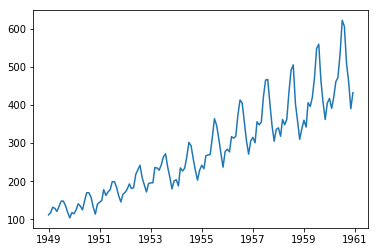

In [7]:
import matplotlib.pylab as plt

plt.plot(passengers.Month, passengers.Passengers)
plt.show()

From this line chart you can see clear evidence of an overall increasing trend in the data along with some seasonal patterns.  However, it is not always possible to make such visual determinations.  
<br>
In cases when it's not obvious, **moving average** and **moving standard deviation** plots can be used as a detection method for trend and seasonality.

Let's calculate the rolling statistics for this time series dataset.

In [8]:
rollmean = passengers.Passengers.rolling(window=12).mean()
rollstd = passengers.Passengers.rolling(window=12).std()

Pandas **.rolling** provides rolling window calculations.  Passing in the *window* argument sets the size of the moving window. This is the number of observations used for calculating the statistic.  We used 12 months for our window size.
<br><br>Now let's chart our rolling statistics plots.

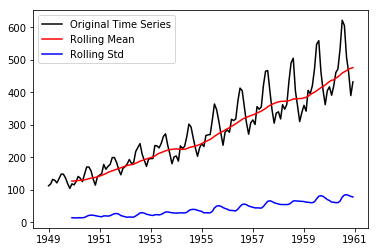

In [9]:
plt.plot(passengers.Month, passengers.Passengers, color='black', label='Original Time Series')
plt.plot(passengers.Month, rollmean, color='red', label='Rolling Mean')
plt.plot(passengers.Month, rollstd, color='blue', label='Rolling Std')
plt.legend()
plt.show()

For each plot, we used the *Month* column of the *passengers* DataFrame as our *x*-axis.  Review the Python for Data Visualizations workshop for plotting multiple lines on the same chart.

The rolling statistics plots show that the variation in standard deviation is slight (blue line) indicating perhaps some seasonality.  However, the mean is clearly increasing with time (red line) indicating the presence of trend.  

# Using Decomposition to Detect Trend and Seasonality

The methods discussed above are really only for detecting an obvious trend and seasonality presence.  Decomposition is a much better method of detection.  Python’s **seasonal_decompose( )** is very good for accomplishing this. To use the **seasonal_decompose( )** method, the time series has to first be indexed by the *Month* column (or whatever column that holds your date values).

In [10]:
passengers.index = passengers.Month
passengers = passengers.drop('Month', axis=1)

Pandas **.index** sets the *Month* column to the index of the time series.  Once we do that, the original *Month* column can be dropped.  We do that using Pandas **.drop** and passing in *axis=1* to specify we are dropping the *Month* column, not the *Month* index we just created.  
<br>
A quick check confirms we now have a time series indexed by the *Month* column.

In [11]:
print(passengers.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


Our time series is ready to be decomposed using **seasonal_decompose( )**.  Take a look at the following decomposition.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(passengers)
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

We first imported **seasonal_decompose( )** from the *statsmodels* library.  After the import, we stored the decomposition of the *passengers* DataFrame into an object called *decomposition* with seasonal, trend, and resid attributes.  We then extracted from this object the attributes and stored them into corresponding DataFrames in preparation for plotting.

Now let's plot the decomposition of the time series dataset.

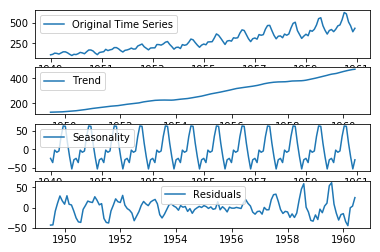

In [14]:
plt.title('Seasonal Decomposition')

plt.subplot(411)
plt.plot(passengers, label='Original Time Series')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonality, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.show()

Use Pandas **.subplot( )** to plot each DataFrame on it's own chart area.  Passing a 3 digit number into **.subplot( )**, describes the position of each plot.  The first digit is the number of rows, the second the number of columns, and the third the index of the subplot.

The Trend and Seasonality plots reveal a clear presence of both trend and seasonality in the data.  Notice how trend is clearly increasing over time and how there is a distinct pattern in the Seasonality plot.  This is evidence that the data is probably non-stationary and so time series modeling should not be done on this data until it is made stationary.

### Exercise

Recall the time series dataset containing the monthly number of sales of shampoo over a 3 year period for a UK-based online store.

In [15]:
sales = pd.read_csv('https://mathatwork.org/DATA/sales-shampoo.csv')
print(sales.head())

     Month  Sales
0  2015-01  266.0
1  2015-02  145.9
2  2015-03  183.1
3  2015-04  119.3
4  2015-05  180.3


**1)** Plot a line chart of the data.  In the cell below your graph, explain by looking at the line chart whether there is clear evidence of trend and/or seasonality.

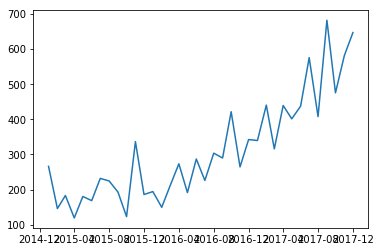

In [16]:
sales.Month = pd.to_datetime(sales.Month)
plt.plot(sales.Month, sales.Sales)
plt.show()

**2)** Calculate the rolling statistics for the shampoo dataset.

In [19]:
rollmean2 = sales.Sales.rolling(window=12).mean()
rollstd2 = sales.Sales.rolling(window=12).std()

**3)** Chart the rolling statistics plots. In the cell below your graph, explain by looking at the rolling statistics plots whether there is clear evidence of trend and/or seasonality.

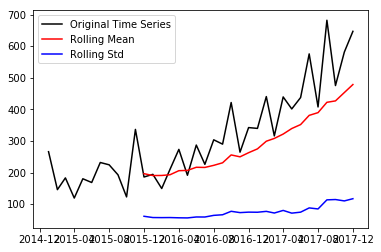

In [20]:
plt.plot(sales.Month, sales.Sales, color='black', label='Original Time Series')
plt.plot(sales.Month, rollmean2, color='red', label='Rolling Mean')
plt.plot(sales.Month, rollstd2, color='blue', label='Rolling Std')
plt.legend()
plt.show()

**4)** Recall, to use the **seasonal_decompose( )** method, the time series has to first be indexed by the *Month* column.  Index the *sales* DataFrame by the *Month* column and then drop the original *Month* column from the DataFrame.

In [21]:
sales.index = sales.Month
sales = sales.drop('Month', axis=1)

**5)** Use **seasonal_decompose( )** to decompose your *sales* time series data.

In [24]:
decomposition2 = seasonal_decompose(sales)
trend2 = decomposition2.trend
seasonality2 = decomposition2.seasonal
residual2 = decomposition2.resid

**6)** Plot the decomposition of the time series dataset.  In the cell below your graphs, explain by looking at the decomposition plots whether there is clear evidence of trend and/or seasonality.

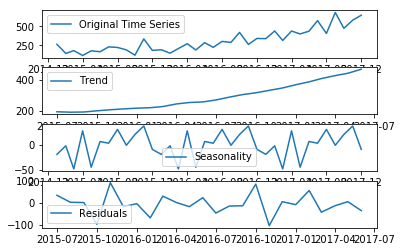

In [25]:
plt.title('Seasonal Decomposition')

plt.subplot(411)
plt.plot(sales, label='Original Time Series')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend2, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonality2, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual2, label='Residuals')
plt.legend(loc='best')

plt.show()

**7)** Can you conclude that the time series is non-stationary?  Explain.